# Maximum Likelihood Estimation of a marginal model

Most of the models in supervised machine learning are estimated using the ML principle. In this section we introduce the principle and outline the objective function of the ML estimator that has wide applicability in many learning tasks.  Assume that we have $m$ examples drawn from a data generator that generates the vectors $\mathbf{x} \in \mathcal{X}$ _independently and identically distributed (i.i.d.)_ according to some unknown (but fixed) probability distribution function $p_{data}(\mathbf{x})$.

$$\mathbb{X} = \{ \mathbf{x}_1, \dots, \mathbf{x}_m \}$$

Let $p_{model}(\mathbf x, \mathbf w)$ a parametric family of probability distributions (our hypothesis set) over the same space that attempts to approximate (model) $p_{data}(\mathbf{x})$ as closely as possible using a suitable estimate of the parameter vector $\mathbf w$. The ML estimator for $\mathbf w$ is defined as:

$$\mathbf w_{ML} = \arg\max_{\mathbf w} p_{model}(\mathbb X; \mathbf w)$$
$$ = \arg\max_{\mathbf w} \prod_{i=1}^m p_{model}(\mathbf x^{(i)}; \mathbf w)$$
$$ = \arg\max_{\mathbf w} \sum_{i=1}^m \log p_{model}(\mathbf x^{(i)}; \mathbf w)$$
$$ = \arg\max_{\mathbf w} \frac{1}{m} \sum_{i=1}^m \log p_{model}(\mathbf x^{(i)}; \mathbf w)$$
$$ = \arg\max_{\mathbf w} \mathbb{E}_{\mathbf{x} \sim \hat p_{data}} \log p_{model}(\mathbf x; \mathbf w)$$

From the last expression it is evident that in ML estimation two distributions are involved: $\hat p_{data}$ and $p_{model}$. We can also make use of our intuition that a good estimator would minimize the distance between the two empirical distributions therefore the KL divergence:  

$$KL( \hat p_{data} || p_{model} ) = \mathbb{E}_{\mathbf x  \sim \hat p_{data}} \left[\log \hat p_{data}(\mathbf x) - \log p_{model}(\mathbf x, \mathbf w) \right] $$

The 1st term is independent of the model and therefore we see that the KL and the ML estimator expressions are _identical_ except from the sign. Therefore we conclude that _minimizing KL divergence, maximizes the likelihood function_. From information theory we know that the KL divergence and  the cross entropy (CE) are related via the expression

$$CE = H(\hat p_{data}, p_{model}) = KL( \hat p_{data} || p_{model} ) + H(\hat p_{data})$$

Given that $\hat p_{data}$ is given in supervised learning, $H(\hat p_{data})$ is constant and therefore we can conclude that in this case, CE is equivalent to the KL i.e. **minimizing the KL divergence, is equivalent in minimizing cross-entropy (CE)**. Therefore the expression the only need to minimize which we will call the CE cost function (also known as log loss) is:

$$ L(\mathbf w) = CE = - \mathbb{E_{\mathbf x \sim \hat p_{data}}}  \log p_{model}(\mathbf x, \mathbf w)$$

Cross entropy is a very generic objective (loss) function that is applicable to any _supervised learning_ problem that uses maximum likelihood to estimate a model.  

To visualize the above, lets start with a simple Gaussian distribution. 

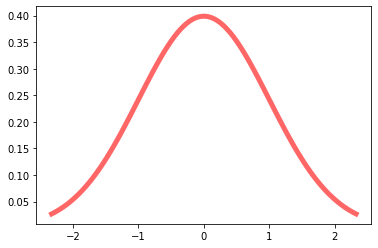

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

We can retrieve the probability of events happening, e.g. x=3.0

In [4]:
p_3 = norm.pdf(3.0, 5.0, 3.0)

We can also easily calculate the joint probability of iid (indepenent and identically distributed) events 

In [6]:
p_7 = norm.pdf(7.0, 7.0, 3.0)

joint = p_3*p_7

Assume now that someone is giving us an array of values and ask us to estimate a $p_{model}$ that is a 'good fit' to the gievn data. How we can go about solving this problem with Maximum Likelihood Estimation (MLE)? Notice that as addressed in [3], probability and likelihood have a reverse relationship.  Probability attaches to possible results; likelihood attaches to hypotheses. The likelihood function gives the relative likelihoods of different values for the parameter(s) of the distribution from which the data are assumed to have been drawn, given those data.

Lets plot a couple of $p_{model}$ hypotheses - the data are shown below in the same plot. Both hypotheses are plausible.  

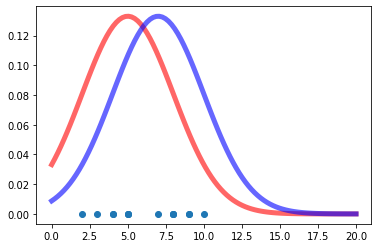

In [9]:
data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 20, 100)
ax.plot(x, norm.pdf(x,5,3),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, norm.pdf(x,7,3),
       'b-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(data, np.zeros(len(data)).tolist(),'o')

As detailed in Ref [2], its important to safeguard against underflow that may well result from multiplying many numbers (for large datasets) that are less than 1.0 (probabilities). So we do the calculations in the log domain using the identity

$$log(a \times b)=log(a) + log(b)$$

Lets look at a function that calculates the log-likelihood for the two hypotheses above given the data denoted by $x$. 

In [11]:
def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=3):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
    
    print("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    print("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2))


We can readily compate the two hypotheses according to the maximum likelihood criterion. Note that because the $log$ is a monotonic function, the conclusion as to which hypothesis makes the data more likely is the same in the natural or the $log$ domain. 

In [12]:
ll_comparison = compare_data_to_dist(data)

The LL of of x for mu = 5 and sd = 3 is: -33.9679
The LL of of x for mu = 7 and sd = 3 is: -33.3013


It seems that the second hypothesis 

$$p_{model}(x|\mathbf{w}) = N(x | [\mu_2, \sigma_2^2])$$

is preferred compared to the first. 

We can now start searching the hypothesis space (parameter space) for the best parameter set $\mathbf w$. 

The max LL for sd 0.50 is 167.88
The max LL for sd 1.50 is 36.84
The max LL for sd 2.50 is 32.28
The max LL for sd 3.50 is 33.77
The max LL for sd 4.50 is 35.96


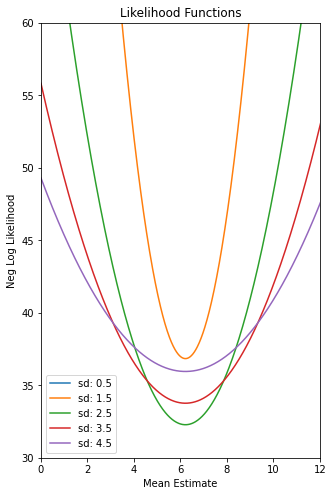

In [23]:
# Plot the Negative Log Likelihood Functions for different values of mu 
# and sigma
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Neg Log Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Neg Log Likelihood")
    plt.ylim(30, 60)
    plt.xlim(0, 12)
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [.5, 1.5, 2.5, 3.5, 4.5]
    max_val = max_val_location = None
    for i in sd_set:
        ll_array = []
        
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
            ll_array.append(-temp_mm) # negative LL
        
            if (max_val is None):
                max_val = min(ll_array)
            elif max(ll_array) > max_val:
                max_val = min(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" % i)
        
        print("The max LL for sd %.2f is %.2f" % (i, min(ll_array)))    
    plt.axvline(x=max_val_location, color='black', ls='-.')
    plt.legend(loc='lower left')
plot_ll(data);


But there is a better method than exhaustively searching in the parameter space. We developed a method that incrementally minimizes a loss function that is ultimately linked to the concept of entropy - the cross entropy (CE) that for the supervided learning problem as shown in the notes has a lot to do with minimizing the KL divergence - a type of probabilistic 'distance' between $\hat p_{data}$ and $p_{model}$. 

This method is the Stochastic Gradient Descent as described in another section. 

# References

1. [Maximum Likelihood Estimation of Gaussian Parameters](http://jrmeyer.github.io/machinelearning/2017/08/18/mle.html)
2. [Section 4.1 - Numerical computation](https://www.deeplearningbook.org/contents/numerical.html)
3. [Bayes for beginners - probability and likelihood](https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood) 